In [1]:
# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt 

# Reading the data set 
df = pd.read_csv("C:/Users/ojohi/Downloads/cookie_cats.csv/cookie_cats.csv")

# show the first few rows
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
# Number of unique player
df["userid"].nunique()

90189

In [3]:
# counting number of players in each A/B group 
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


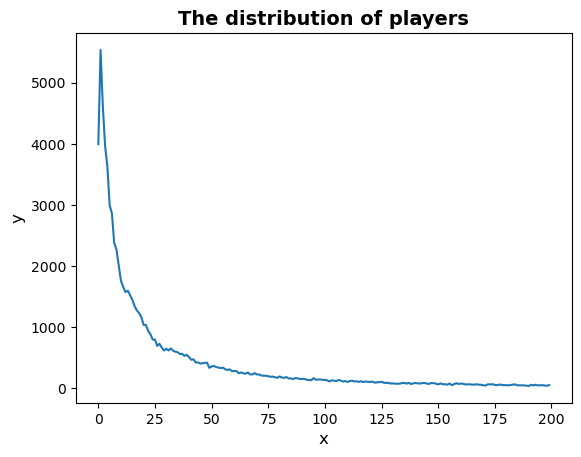

In [4]:
# The distribution of game rounds 

# counting the number of players fpr each number of gamerounds 
plot_df = df.groupby("sum_gamerounds")["userid"].count()


# plotting the distribution of players that played 0 to 100 game rounds 
ax = plot_df.head(200).plot()
plt.title("The distribution of players", fontweight = "bold", size = 14)
plt.xlabel("x", size = 12)
plt.ylabel("y", size = 12)
plt.show()

In [5]:
df[df["sum_gamerounds"]== 0]["userid"].count()

3994

In [6]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-day retention: {round(df_retention[0],2)}% \
        \n7-days retention ratio: {round(df_retention[1],2)}%")

1-day retention: 44.52%         
7-days retention ratio: 18.61%


In [7]:
## personal checks 

retention_counts = df["retention_1"].value_counts()

# Extract counts
true_count = retention_counts.get(True, 0)
false_count = retention_counts.get(False, 0)

# Print the counts
print(f"Number of True values: {true_count}")
print(f"Number of False values: {false_count}")

Number of True values: 40153
Number of False values: 50036


In [8]:
# calculating 1-day and 7-day retention for each A/B group

df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


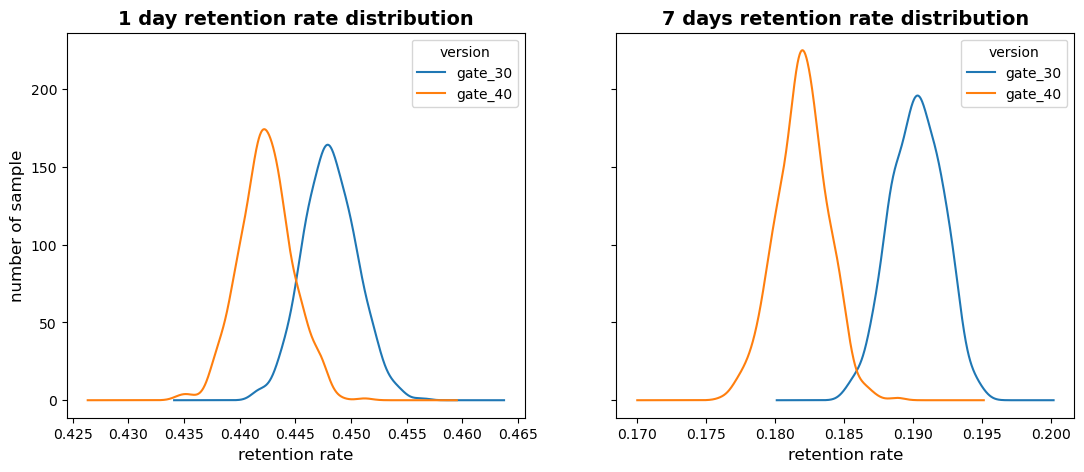

In [13]:
# Creating an list with bootstrapped means for each A/B group

boot_1d = []
boot_7d = []

for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace = True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace = True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)
    
# Transforming the list to a dataframe
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

# Kernel Density Estimate plot of the bootstrao distributions 
fig, (ax1,ax2) = plt.subplots(1,2, sharey = True, figsize = (13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retention rate", size=12)
ax1.set_ylabel("number of sample", size=12)
ax1.set_title("1 day retention rate distribution", fontweight = "bold", size = 14)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retention rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=14)
plt.show()

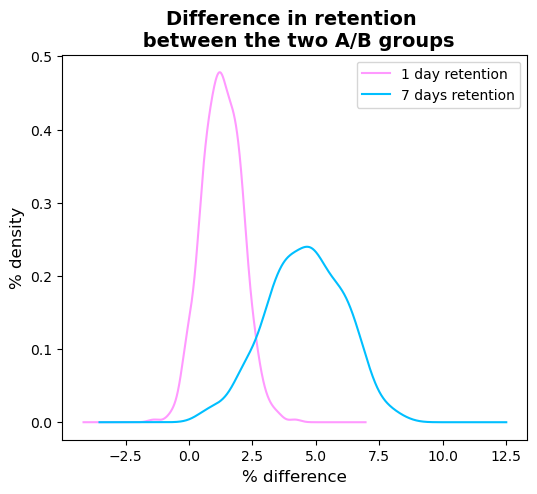

In [14]:
# Adding a column with the % difference between the two A/B groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=12)
ax1.set_ylabel("% density",size=12)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=14)
plt.legend()
plt.show()

In [16]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30

prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Calculating the probaility that 7-day retention is greater when the gate is at level 30 

prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(f"The probability that 1-day retention is greater when the gate is at level 30: {round(prob_1,2)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")


The probability that 1-day retention is greater when the gate is at level 30: 95.0%       
The probability that 7-days retention is greater when the gate is at level 30: 100.0% 
